In [213]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# X_train = pd.read_csv("weekly_agg_county/x_train_county_aggregated_weekly.csv",index_col=0)
# y_train = pd.read_csv("weekly_agg_county/y_train_county_aggregated_weekly.csv",index_col=0)
# X_test = pd.read_csv("weekly_agg_county/x_test_county_aggregated_weekly.csv",index_col=0)
# y_test = pd.read_csv("weekly_agg_county/y_test_county_aggregated_weekly.csv",index_col=0)

# X_train = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_x_train.csv",index_col=0)
# y_train = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_y_train.csv",index_col=0)
# X_test = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_x_test.csv",index_col=0)
# y_test = pd.read_csv("/data/BHI_G5/weekly_agg_county/Omicron_Pred/scaled_y_test.csv",index_col=0)

X_train = pd.read_csv("/data/BHI_G5/daily_agg_county/7_day/7dayx_train.csv",index_col=0)
y_train = pd.read_csv("/data/BHI_G5/daily_agg_county/7_day/7dayy_train.csv",index_col=0)
X_val = pd.read_csv("/data/BHI_G5/daily_agg_county/7_day/7dayx_val.csv",index_col=0)
y_val = pd.read_csv("/data/BHI_G5/daily_agg_county/7_day/7dayy_val.csv",index_col=0)


X_test = pd.read_csv("/data/BHI_G5/daily_agg_county/7_day/7dayx_test.csv",index_col=0)
y_test = pd.read_csv("/data/BHI_G5/daily_agg_county/7_day/7dayy_test.csv",index_col=0)

In [184]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install skforecast

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [214]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput

#xg_reg = ForecasterAutoregMultiOutput(xgb.XGBRegressor((objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 6, min_child_weight = 4, alpha = 10, n_estimators = 500, nthread = 4, silent = 1, subsample = 0.7)), steps = 36, lag = 8)
#xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear', num_round = 100, colsample_bytree = 0.3, learning_rate = 0.5, max_depth = 5, alpha = 10, n_estimators = 500))
#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 6, min_child_weight = 4, alpha = 0, n_estimators = 500, nthread = 4, silent = 1, subsample = 0.7))

In [215]:
y_trainfirst = y_train.iloc[:,0]
y_valfirst = y_val.iloc[:,0]

In [188]:
#y_train

In [216]:
#y_train = pd.Series(y_train)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_val)

[15:07:17] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:17] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:18] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:18] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:07:18] WARNING: ../src/objective/regression_

In [217]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, preds))
print("RMSE: %f" % (rmse))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, preds)
print("MAE: %f" % (mae))

mse = mean_squared_error(y_val, preds)
print("MSE: %f" % (mse))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_val, preds)
print("MAPE: %f" % (mape))

RMSE: 0.216826
MAE: 0.174772
MSE: 0.047014
MAPE: 0.228130


In [191]:
# def mean_absolute_percentage_error(y_val, preds): 
#     y_true, y_pred = np.array(y_val), np.array(preds)
#     return np.mean(np.abs((y_val - preds) / y_val)) * 100

# mean_absolute_percentage_error

In [218]:
mappp = np.mean(np.abs((y_val - preds) / y_val)) * 100
mappp

metrics.deathDensity(t)      12.942780
metrics.caseDensity(t)       23.029967
metrics.deathDensity(t+1)    13.019709
metrics.caseDensity(t+1)     24.352009
metrics.deathDensity(t+2)    12.961357
metrics.caseDensity(t+2)     28.511479
metrics.deathDensity(t+3)    13.085904
metrics.caseDensity(t+3)     30.375788
metrics.deathDensity(t+4)    13.087720
metrics.caseDensity(t+4)     33.352211
metrics.deathDensity(t+5)    12.835543
metrics.caseDensity(t+5)     38.035092
metrics.deathDensity(t+6)    13.580976
metrics.caseDensity(t+6)     50.210899
dtype: float64

In [193]:
preds

array([[ 0.5636496 , -0.620229  ,  0.5647817 , ..., -0.6313132 ,
         0.574794  , -0.61850715],
       [ 0.56261474, -0.6313582 ,  0.56426924, ..., -0.61317617,
         0.57406193, -0.59669286],
       [ 0.56201637, -0.6306518 ,  0.5640792 , ..., -0.58364034,
         0.57399917, -0.57752746],
       ...,
       [ 0.5589003 , -0.4849344 ,  0.5572892 , ..., -0.48303849,
         0.56336814, -0.5271881 ],
       [ 0.5577359 , -0.43762553,  0.55782473, ..., -0.47350872,
         0.56219727, -0.5305417 ],
       [ 0.5557999 , -0.37982264,  0.5571906 , ..., -0.42473546,
         0.56032735, -0.47322115]], dtype=float32)

In [194]:
#rolmean = df['metrics.caseDensity'].rolling(7).mean()

In [195]:
preds.shape

(94, 14)

In [196]:
y_test

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.704836,-0.289115,0.706336,-0.230692,0.706897,-0.194339,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805
2021-07-30,0.706336,-0.230692,0.706897,-0.194339,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378
2021-07-31,0.706897,-0.194339,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378,0.719369,0.155552
2021-08-01,0.707150,-0.149717,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378,0.719369,0.155552,0.719933,0.220510
2021-08-02,0.709063,-0.109956,0.712073,-0.050929,0.714979,0.015805,0.716998,0.087378,0.719369,0.155552,0.719933,0.220510,0.720253,0.270596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,1.704336,1.598608,1.708077,1.977789,1.708664,2.326160,1.708995,2.672002,1.717694,3.000612,1.727410,3.385488,1.737343,3.775976
2021-12-31,1.708077,1.977789,1.708664,2.326160,1.708995,2.672002,1.717694,3.000612,1.727410,3.385488,1.737343,3.775976,1.745241,4.143171
2022-01-01,1.708664,2.326160,1.708995,2.672002,1.717694,3.000612,1.727410,3.385488,1.737343,3.775976,1.745241,4.143171,1.752862,4.583388


In [197]:
X_test

,actuals.cases(t-14),actuals.deaths(t-14),metrics.deathDensity(t-14),metrics.caseDensity(t-14),metrics.vaccinationsCompletedRatio(t-14),metrics.vaccinationsInitiatedRatio(t-14),cdcTransmissionLevel(t-14),riskLevels.caseDensity(t-14),riskLevels.overall(t-14),actuals.cases(t-13),...,riskLevels.overall(t-2),actuals.cases(t-1),actuals.deaths(t-1),metrics.deathDensity(t-1),metrics.caseDensity(t-1),metrics.vaccinationsCompletedRatio(t-1),metrics.vaccinationsInitiatedRatio(t-1),cdcTransmissionLevel(t-1),riskLevels.caseDensity(t-1),riskLevels.overall(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2021-07-29,0.602350,0.729061,0.689774,-0.858122,0.980125,0.905109,-0.951312,-0.928586,-0.721774,0.607202,...,-0.021660,0.644438,0.741781,0.703664,-0.355442,1.016009,0.958546,0.125869,-0.216856,0.042171
2021-07-30,0.607202,0.730263,0.691312,-0.840720,0.985162,0.907654,-0.861040,-0.886208,-0.663078,0.607939,...,0.042171,0.649147,0.743149,0.704836,-0.289115,1.019459,0.966006,0.211852,-0.133201,0.099115
2021-07-31,0.607939,0.730587,0.691514,-0.817216,0.987472,0.910633,-0.788276,-0.854530,-0.613452,0.608486,...,0.099115,0.660757,0.745159,0.706336,-0.230692,1.022487,0.972213,0.292954,-0.057225,0.163654
2021-08-01,0.608486,0.730698,0.691574,-0.798234,0.989478,0.913286,-0.729206,-0.818533,-0.558230,0.611897,...,0.163654,0.662512,0.745710,0.706897,-0.194339,1.025576,0.977878,0.351070,-0.004203,0.200766
2021-08-02,0.611897,0.731697,0.692691,-0.779237,0.991852,0.916274,-0.657990,-0.787872,-0.503039,0.614146,...,0.200766,0.663895,0.745959,0.707150,-0.149717,1.027583,0.982165,0.391085,0.049835,0.233112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,1.588492,1.531432,1.611433,0.507352,1.575462,1.579818,0.751574,0.657611,0.697087,1.599765,...,1.096617,1.771768,1.609863,1.699041,1.193656,1.601060,1.612434,1.141598,1.204798,1.268894
2021-12-31,1.599765,1.539750,1.620292,0.484910,1.578702,1.583385,0.776107,0.643861,0.679715,1.604261,...,1.268894,1.801830,1.615218,1.704336,1.598608,1.603130,1.614962,1.165059,1.449382,1.512873
2022-01-01,1.604261,1.541744,1.621761,0.495472,1.581064,1.586561,0.822195,0.673393,0.696227,1.608304,...,1.512873,1.842416,1.620063,1.708077,1.977789,1.605485,1.618446,1.181850,1.650939,1.701784


In [219]:
# y_pred.shape
col = y_test.columns

In [272]:
y_pred = xg_reg.predict(X_test)
y_pred_df=pd.DataFrame()
y_pred_df[col] = y_pred
y_pred_df.index = y_test.index
y_pred_df

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.555593,-0.345878,0.557833,-0.337487,0.557461,-0.353129,0.559090,-0.310690,0.557982,-0.337984,0.564417,-0.358330,0.560507,-0.412339
2021-07-30,0.554766,-0.291447,0.558550,-0.275773,0.558287,-0.291447,0.560289,-0.307209,0.557169,-0.329561,0.564909,-0.336115,0.560287,-0.413387
2021-07-31,0.554106,-0.247855,0.556654,-0.253995,0.558513,-0.270725,0.557494,-0.285107,0.553420,-0.302899,0.561426,-0.329542,0.558683,-0.388252
2021-08-01,0.551039,-0.231830,0.554681,-0.251446,0.554067,-0.267319,0.555034,-0.285914,0.552455,-0.315019,0.556427,-0.330339,0.556229,-0.384900
2021-08-02,0.551380,-0.162892,0.553770,-0.222606,0.553645,-0.237415,0.554206,-0.274750,0.552690,-0.308190,0.557115,-0.336280,0.558299,-0.378973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,0.529043,1.110743,0.522031,1.135249,0.533933,1.095730,0.536401,0.721021,0.547866,0.557938,0.544881,0.355203,0.550846,0.292552
2021-12-31,0.527442,1.561733,0.510651,1.541419,0.532153,1.374783,0.533053,0.963960,0.548601,0.637789,0.546251,0.368227,0.551096,0.300371
2022-01-01,0.528336,1.784608,0.506549,1.660659,0.531316,1.427863,0.534857,0.981239,0.548410,0.657419,0.544541,0.360525,0.549061,0.299325


In [200]:
y_pred_df.head(7)

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.555593,-0.345878,0.557833,-0.337487,0.557461,-0.353129,0.559090,-0.310690,0.557982,-0.337984,0.564417,-0.358330,0.560507,-0.412339
2021-07-30,0.554766,-0.291447,0.558550,-0.275773,0.558287,-0.291447,0.560289,-0.307209,0.557169,-0.329561,0.564909,-0.336115,0.560287,-0.413387
2021-07-31,0.554106,-0.247855,0.556654,-0.253995,0.558513,-0.270725,0.557494,-0.285107,0.553420,-0.302899,0.561426,-0.329542,0.558683,-0.388252
2021-08-01,0.551039,-0.231830,0.554681,-0.251446,0.554067,-0.267319,0.555034,-0.285914,0.552455,-0.315019,0.556427,-0.330339,0.556229,-0.384900
2021-08-02,0.551380,-0.162892,0.553770,-0.222606,0.553645,-0.237415,0.554206,-0.274750,0.552690,-0.308190,0.557115,-0.336280,0.558299,-0.378973
2021-08-03,0.550042,-0.139918,0.552236,-0.181813,0.553635,-0.216220,0.554376,-0.253511,0.554390,-0.293144,0.558336,-0.339936,0.560262,-0.373173
2021-08-04,0.550453,-0.108824,0.552254,-0.137300,0.552945,-0.163871,0.553854,-0.171955,0.554648,-0.257858,0.558104,-0.272071,0.560264,-0.314672


In [273]:
new_y_pred_df=y_pred_df.iloc[::7, :]
new_y_pred_df

,metrics.deathDensity(t),metrics.caseDensity(t),metrics.deathDensity(t+1),metrics.caseDensity(t+1),metrics.deathDensity(t+2),metrics.caseDensity(t+2),metrics.deathDensity(t+3),metrics.caseDensity(t+3),metrics.deathDensity(t+4),metrics.caseDensity(t+4),metrics.deathDensity(t+5),metrics.caseDensity(t+5),metrics.deathDensity(t+6),metrics.caseDensity(t+6)
date,,,,,,,,,,,,,,
2021-07-29,0.555593,-0.345878,0.557833,-0.337487,0.557461,-0.353129,0.559090,-0.310690,0.557982,-0.337984,0.564417,-0.358330,0.560507,-0.412339
2021-08-05,0.549238,-0.052238,0.552506,-0.071449,0.549882,-0.069922,0.551798,-0.099900,0.554209,-0.170568,0.556968,-0.193815,0.560956,-0.265846
2021-08-12,0.545735,0.375010,0.538884,0.302990,0.542086,0.266955,0.542240,0.254384,0.552726,0.190228,0.549499,0.194666,0.557421,0.135623
2021-08-19,0.543736,0.742857,0.536320,0.645090,0.538182,0.588436,0.539827,0.433137,0.548632,0.377866,0.546012,0.298489,0.558154,0.198289
2021-08-26,0.529969,1.069252,0.522488,1.120045,0.533024,1.101571,0.535946,0.712341,0.548343,0.535353,0.545805,0.362127,0.551100,0.293245
2021-09-02,0.517922,1.511019,0.501287,1.517328,0.522761,1.393054,0.523501,1.013725,0.538090,0.638849,0.531798,0.367888,0.545672,0.300044
2021-09-09,0.511858,1.311900,0.492319,1.306515,0.515708,1.210359,0.516063,0.822905,0.535284,0.565914,0.531301,0.347199,0.533527,0.299430
2021-09-16,0.512916,1.404858,0.494212,1.456477,0.516122,1.279055,0.517872,0.957735,0.535020,0.660653,0.531893,0.376363,0.532082,0.309534
2021-09-23,0.511407,1.094450,0.491679,1.162345,0.514488,1.116570,0.516585,0.736188,0.534227,0.559685,0.530951,0.356766,0.532274,0.298690


In [275]:
#Case Density DataFrame
cases_y_pred_df = new_y_pred_df
cases_y_pred_df = cases_y_pred_df.drop(['metrics.deathDensity(t)', 'metrics.deathDensity(t+1)', 'metrics.deathDensity(t+2)', 'metrics.deathDensity(t+3)', 'metrics.deathDensity(t+4)', 'metrics.deathDensity(t+5)', 'metrics.deathDensity(t+6)'], axis = 1)
cases_y_pred_df

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2021-07-29,-0.345878,-0.337487,-0.353129,-0.310690,-0.337984,-0.358330,-0.412339
2021-08-05,-0.052238,-0.071449,-0.069922,-0.099900,-0.170568,-0.193815,-0.265846
2021-08-12,0.375010,0.302990,0.266955,0.254384,0.190228,0.194666,0.135623
2021-08-19,0.742857,0.645090,0.588436,0.433137,0.377866,0.298489,0.198289
2021-08-26,1.069252,1.120045,1.101571,0.712341,0.535353,0.362127,0.293245
2021-09-02,1.511019,1.517328,1.393054,1.013725,0.638849,0.367888,0.300044
2021-09-09,1.311900,1.306515,1.210359,0.822905,0.565914,0.347199,0.299430
2021-09-16,1.404858,1.456477,1.279055,0.957735,0.660653,0.376363,0.309534
2021-09-23,1.094450,1.162345,1.116570,0.736188,0.559685,0.356766,0.298690


In [281]:
# death_y_pred_df = new_y_pred_df
# death_y_pred_df = death_y_pred_df.drop(['metrics.caseDensity(t)', 'metrics.caseDensity(t+1)', 'metrics.caseDensity(t+2)', 'metrics.caseDensity(t+3)', 'metrics.caseDensity(t+4)', 'metrics.caseDensity(t+5)', 'metrics.caseDensity(t+6)'], axis=1)
# death_y_pred_df

In [276]:
#case density
df_new1 = pd.DataFrame({'date': pd.date_range('2021-07-29','2022-01-03')})

transposecase_y_pred_df = cases_y_pred_df.T
ransposecase_y_pred_df = transposecase_y_pred_df.stack().reset_index()
#dff=y_pred_df
dff1= ransposecase_y_pred_df.iloc[:,2]


dfff1=pd.DataFrame(dff1)
dfff1.drop(dfff1.tail(2).index, inplace = True)
# new_y_pred_df = transposedeath_y_pred_df.stack()
# df_new = pd.concat([df_new, new_y_pred_df])
df_new1['date'] = pd.to_datetime(df_new1['date'])

df_new1.set_index('date')
new_df1 = pd.concat([df_new1, dfff1], axis=1)
new_df1.set_index('date')

,0
date,
2021-07-29,-0.345878
2021-07-30,-0.052238
2021-07-31,0.375010
2021-08-01,0.742857
2021-08-02,1.069252
...,...
2021-12-30,-0.111175
2021-12-31,-0.024034
2022-01-01,-0.246655


In [280]:
#death density not needed 
# transposedeath_y_pred_df = death_y_pred_df.T
# ransposedeath_y_pred_df = transposedeath_y_pred_df.stack().reset_index()
# #dff=y_pred_df
# dff= ransposedeath_y_pred_df.iloc[:,2]


# dfff=pd.DataFrame(dff)
# dfff.drop(dfff.tail(2).index, inplace = True)


# y_pred_df_date = y_pred_df.iloc[:,0]
# y_pred_df_date

# #new_df = pd.concat([y_pred_df_date, dfff], axis=1)
# #new_df
# #deathpred=y_pred_df
# #deathpred['predicted']= dfff
# #deathpred.predicted = deathpred.predicted.astype(float)
#deathpred
#deathpred = [y_pred_df, dfff]
#deathpred

In [ ]:
death_y_pred_df = new_y_pred_df
death_y_pred_df = death_y_pred_df.drop(['metrics.caseDensity(t)', 'metrics.caseDensity(t+1)', 'metrics.caseDensity(t+2)', 'metrics.caseDensity(t+3)', 'metrics.caseDensity(t+4)', 'metrics.caseDensity(t+5)', 'metrics.caseDensity(t+6)'], axis=1)
death_y_pred_df

In [271]:
#Death Density
df_new = pd.DataFrame({'date': pd.date_range('2021-07-29','2022-01-03')})

transposedeath_y_pred_df = death_y_pred_df.T
ransposedeath_y_pred_df = transposedeath_y_pred_df.stack().reset_index()
#dff=y_pred_df
dff= ransposedeath_y_pred_df.iloc[:,2]


dfff=pd.DataFrame(dff)
dfff.drop(dfff.tail(2).index, inplace = True)
# new_y_pred_df = transposedeath_y_pred_df.stack()
# df_new = pd.concat([df_new, new_y_pred_df])
df_new['date'] = pd.to_datetime(df_new['date'])

df_new.set_index('date')
new_df = pd.concat([df_new, dfff], axis=1)
new_df.set_index('date')

,0
date,
2021-07-29,0.555593
2021-07-30,0.549238
2021-07-31,0.545735
2021-08-01,0.543736
2021-08-02,0.529969
...,...
2021-12-30,0.557768
2021-12-31,0.555313
2022-01-01,0.556627


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


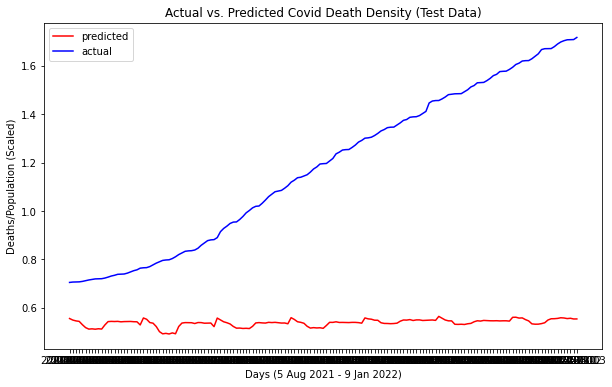

In [260]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(new_df[0], color='red')
plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
plt.ylabel('Deaths/Population (Scaled)')
plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
plt.legend(['predicted', 'actual'])

In [279]:
# for col in y_pred_df.columns:    
#     print(col)

In [278]:
# import pandas as pd
# #y_pred_df[:,1] = pd.DatetimeIndex(y_pred_df['date'].values)
# new_y_pred_df = y_pred_df.groupby(pd.Grouper(key='metrics.deathDensity(t)', axis=0, freq='7D', sort=True)).mean()
# new_y_pred_df

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


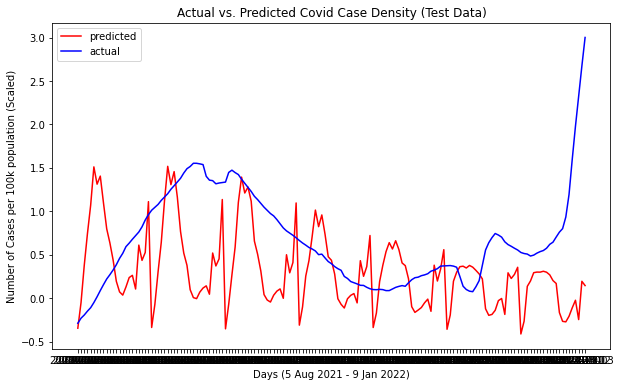

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(new_df1[0], color='red')
plt.plot(y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population (Scaled)')
plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
plt.legend(['predicted', 'actual'])

In [284]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
# plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
# plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
# plt.ylabel('Deaths/Population (Scaled)')
# plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
# plt.legend(['predicted', 'actual'])

<AxesSubplot:>

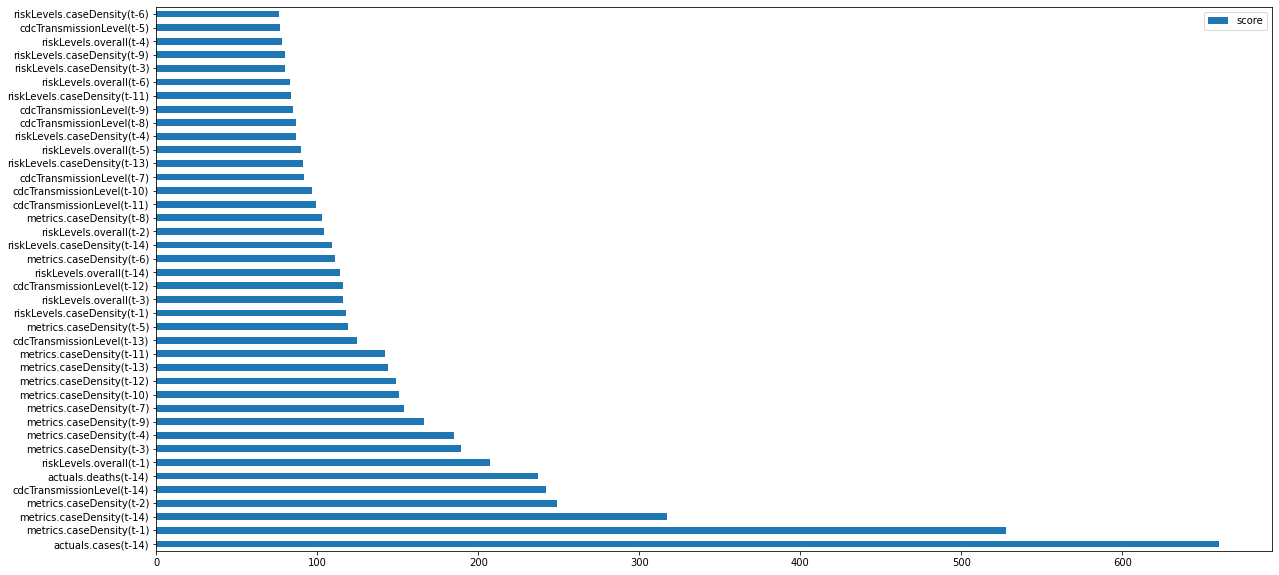

In [19]:
# Change estimators[?] to 0 for deaths and 1 for cases
feature_important = xg_reg.estimators_[1].get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

%matplotlib inline
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [20]:
X_train.columns.tolist()[43]

'riskLevels.caseDensity(t-10)'

In [21]:
newindices = []
for index in data.index:
    index = int((index.lstrip('f'))
    newindex = X_train.columns.tolist()[index]
    newindices.append(newindex)
    
data.index = newindices

SyntaxError: invalid syntax (<ipython-input-21-d654423a136e>, line 4)

In [ ]:
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features
plt.title('Covid Death Density Feature Importance')

In [ ]:
# concatenate all x and all y separately for feature importance

In [ ]:
pip install hyperopt

In [490]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [491]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
import lightgbm as lgb

def objective_function(params):
    clf = lgb.LGBMClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    return {'loss': -score, 'status': STATUS_OK}

In [492]:
from hyperopt import hp
import numpy as np

space= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'n_estimators': hp.quniform('n_estimators', 5, 35, 1),
    'num_leaves': hp.quniform('num_leaves', 5, 50, 1),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}

In [493]:
from hyperopt import tpe

tpe_algorithm = tpe.suggest

In [494]:
from hyperopt import Trials

trials = Trials()

In [495]:
import csv

# File to save first results
out_file = 'gbm_trials.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()

In [496]:
from hyperopt import fmin, tpe, Trials

import numpy as np

num_eval = 500

trials = Trials()

best_param = fmin(objective_function, space, algo=tpe.suggest, max_evals=num_eval, trials=trials, rstate= np.random.RandomState(1))

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random.mtrand.RandomState' object has no attribute 'integers'

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


train_df = X_train #pd.read_csv('../input/train.csv', dtype={'id': np.int32, 'target': np.int8})
Y = y_train #train_df['target'].values
X = X_train #train_df.drop(['target', 'id'], axis=1)
test_df = y_test #pd.read_csv('../input/test.csv', dtype={'id': np.int32})
test = y_test #test_df.drop(['id'], axis=1)

In [ ]:
params = {}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, Y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [497]:
y_test = random_search.predict_proba(test)
results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
results_df.to_csv('submission-random-grid-search-xgb-porto-01.csv', index=False)

NameError: name 'random_search' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
'objective':['reg:linear'],
'learning_rate': [.03, 0.05, .07], #so called `eta` value
'max_depth': [5, 6, 7],
'min_child_weight': [4],
'silent': [1],
'subsample': [0.7],
'colsample_bytree':[0.7],
'n_estimators': [500]}
xgb_grid = GridSearchCV(xg_reg,parameters,cv = 10, n_jobs = 2, verbose=1) #cv= Number of folds (Default to 10)



xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [498]:
from xgboost import plot_importance, plot_tree

plot_importance(xg_reg._Booster, height=0.9)

AttributeError: 'MultiOutputRegressor' object has no attribute '_Booster'

ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [ ]:
#WORKING GRID SEARCH
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
parameters = {'estimator__nthread':[4], #when use hyperthread, xgboost may become slower
              'estimator__objective':['reg:linear'],
              'estimator__learning_rate': [0.03, 0.05, 0.07, 0.2, 0.3], #so called `eta` value
              'estimator__max_depth': [4, 5, 6, 7, 8],
              'estimator__min_child_weight': [1, 2, 3, 4, 5, 6, 7],
              'estimator__silent': [1],
              'estimator__subsample': [0.7, 1],
              'estimator__colsample_bytree':[0.7, 1],
              'estimator__n_estimators': [500]}
model = xgb.XGBRegressor()
multilabel_model = MultiOutputRegressor(model)

xgb_grid = GridSearchCV(multilabel_model,
                        parameters,
                        cv = 10, #cv= Number of folds (Default to 10)
                        n_jobs = 5,
                        verbose=True)

# fit the model
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

best_model = xgb_grid.best_estimator_